**Resolver**

 Decamiento radioactivo

\begin{equation}
\frac{\mathrm{d}N}{\mathrm{d}t}=-λ N
\end{equation}






  Oscilador armónico

\begin{equation}   
m \frac{d^2x}{dt^2}+kx + bv=0
\end{equation}


**********************************************

#**Por método de Euler**


**Ecuaciones diferenciales de primer orden**



Supongamos que tenemos la siguiente ecuación diferencial



<br>

$$y^{,}=f(x,y) \hspace{1cm} (1)$$
<br>

Ahora se tiene en cuenta la ecuación de la pendiente

$$y^{,}=\frac{dy}{dx}=m=\frac{y_1-y_0}{x_1-x_0}  \hspace{1cm}(2)$$

Ahora de (1) y (2)
$$\frac{y_1-y_0}{x_1-x_0} = f(x,y) $$

$$ y_1 = y_0 + (x_1-x_0)*f(x_0,y_0)$$


Por lo tanto nuestra formúla de iteración tiene la forma:

$$y_{i+1} = y_i + Δx*f(x,y) \hspace{1cm}(3) $$

Donde **$Δx$** será el tamaño de paso y **$f(x,y)$** tendrá una forma particular según la ecuación diferencial que estemos solucionando.


**Ecuaciones diferenciales de segundo orden**

Cuando se desea trabajar con **Ed**  de orden superior lo que se utiliza es hacer una reducción de orden trabajando con un sistema de dos ecuaciones de primer orden.
tomando como ejemplo el oscilador armónico









\begin{equation}   
m \frac{d^2}{dt^2}x+ b\frac{d}{dt}x+kx =0
\end{equation}

$$m x''+ bx'+kx =0$$

$$x''= \frac{1}{m}(-b*x'-k*x)$$

Condiciones iniciales

$t_0=0$


$x_0 = x(t_0) = 1$

$x'_0= x'(t_0) = 2 = u_0$


Ahora hacemos las sustituciones

 $$x' = u $$
 <br>
 $$x''= u'$$

 tenemos que:

 $$u'= \frac{1}{m}(-b*u-k*x)$$


Por lo cual se terndrían las siguientes ecuaciones de iteración


$$ x_{i+1} = x_i + Δt*u_i  $$

$$   u_{i+1} = u_i + Δx* \frac{1}{m}(-b*u_i- k*x_i)  $$


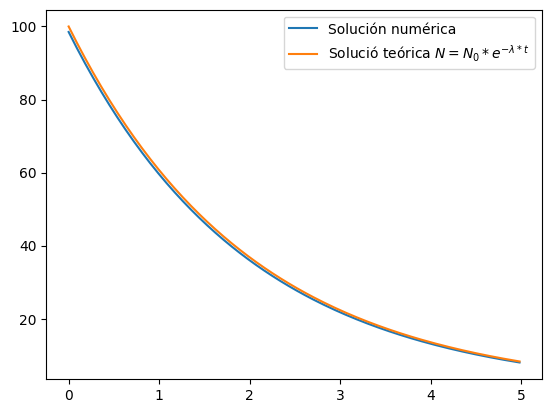

In [1]:
                    #***************************************************
                    #***************************************************

                           #Solucion del decaimiento radioactivo

                    #****************************************************
                    #****************************************************



import numpy as np
import matplotlib.pyplot as plt

#**************************
#solución teórica de la ed
def f(t):
    return 100*np.exp(-0.5*t)

#**************************

landa = 0.5

delta = 0.03

t = np.arange(0, 5, delta)

N_sig = np.zeros(len(t))



#Condiciones iniciales
N_ant = 100


for i in range(0,len(t)):

    N_sig[i] = N_ant + delta * ( -landa * N_ant )

    N_ant = N_sig[i]



plt.plot(t,N_sig,label='Solución numérica')
plt.plot(t,f(t),label ='Solució teórica $ N = N_{0} * e^{-λ*t}$')

plt.legend()
plt.show()





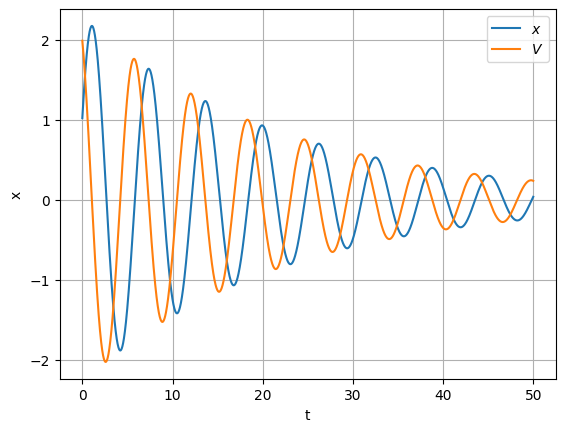

In [2]:
                    #***************************************************
                    #***************************************************

                                #Solución del oscilador armónico

                    #****************************************************
                    #****************************************************



import numpy as np
import matplotlib.pyplot as plt

b = 0.1
k = 1
m = 1

delta = 0.01

t = np.arange(0,50,delta)

x_sig = np.zeros(len(t))
u_sig = np.zeros(len(t))


#Condiciones iniciales
x_ant = 1
u_ant = 2

for i in range(0,len(t)):

    x_sig[i] = x_ant + delta * u_ant
    u_sig[i] = u_ant + delta * (1/m )*( -b * u_ant - k * x_ant )

    u_ant = u_sig[i]
    x_ant = x_sig[i]



plt.plot(t,x_sig,label='$x$')
plt.plot(t,u_sig,label='$V$')

plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()





#**Runge-kutta(RK4)**

 **Euaciones Diferenciales de Primer orden**


 **Método de Runge-Kutta de Cuarto Orden (RK4)**

Supongamos que tenemos una EDO de primer orden dada por:

$$\frac{dy}{dt} = f(t, y) $$

Donde $y$ es la función desconocida que queremos encontrar y $f(t, y)$ es una función que define la derivada de $y$ respecto a $t$.

El método RK4 utiliza la siguiente fórmula iterativa para calcular $y_{n+1}$:

**Para este método tenemos los siguientes elementos:**
   - $h$ es el tamaño del paso.
   - $t_n$ es el valor actual de la variable independiente.
   - $y_n$ es el valor actual de la función $y(t)$.


   $$k_1 = h \cdot f(t_n, y_n)$$
   $$k_2 = h \cdot f(t_n + \frac{h}{2}, y_n + \frac{k_1}{2})$$
   $$k_3 = h \cdot f(t_n + \frac{h}{2}, y_n + \frac{k_2}{2})$$
   $$k_4 = h \cdot f(t_n + h, y_n + k_3)$$

**Cálculo del próximo valor de $y$:**
   $$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$
 **Actualizar $t$ para el próximo paso:**
   $$t_{n+1} = t_n + h$$





**Método Runge-kuta (RK4) Euaciones Diferenciales de Segundo orden**


$$ \frac{d^2y }{dx^2}= f(x, y, \frac{dy}{dx}) $$

Lo primero es despejar $ \frac{d^2 y }{dx^2}$. donde $y$ es la función desconocida que queremos aproximar. Para aplicar el método de Runge-Kutta, convertiremos esta ecuación de segundo orden en un sistema de dos ecuaciones de primer orden introduciendo una nueva variable.
 $$v = \frac{dy}{dx}$$obteniendo el siguiente sistema:

\[
\begin{align*}
\frac{dy}{dx} &= v \\
\frac{dv}{dx} &= f(x, y, v)
\end{align*}
\]

Ahora, aplicamos el método de Runge-Kutta de cuarto orden para resolver este sistema de ecuaciones. El método se expresa en la siguiente forma general:

\[
\begin{align*}
l_1 &= h v_n \\
k_1 &= h f(x_n , y_n ,  v_n) \\
\\
l_2 &= h (v_n + \frac{k_1}{2}) \\
k_2 &= h f(x_n + \frac{h}{2}, y_n + \frac{l_1}{2}, v_n + \frac{k_1}{2}) \\
\\
l_3 &= h (v_n + \frac{k_2}{2}) \\
k_3 &= h f(x_n + \frac{h}{2}, y_n + \frac{l_2}{2}, v_n + \frac{k_2}{2}) \\
\\
l_4 &= h (v_n + k_3) \\
k_4 &= h f(x_n + h, y_n + l_3, v_n + k_3) \\
\end{align*}
\]

Y luego actualizamos $y$ y $v$ usando las fórmulas:

\[
\begin{align*}
y_{n+1} &= y_n + \frac{1}{6}(l_1 + 2l_2 + 2l_3 + l_4) \\
v_{n+1} &= v_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
\]

En estas fórmulas, $h$ es el tamaño del paso, $x_n$ es el valor actual de la variable independiente, $y_n$ y $v_n$ son las aproximaciones actuales de $y$ y $\frac{dy}{dx}$, respectivamente.

Este proceso se repite para obtener las aproximaciones sucesivas de $y$ y $\frac{dy}{dx}$ a medida que avanzamos en la variable independiente $x$.

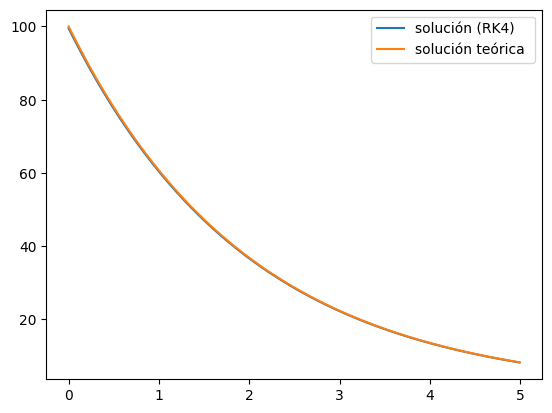

In [3]:

                    #*****************************************************
                    #******************************************************

                           #Solucion del decaimiento radioactivo por(RK4)

                    #******************************************************
                    #******************************************************


import numpy as np
import matplotlib.pyplot as plt

#**************************
#solución teórica de la ed
def f(t):
    return 100*np.exp(-0.5*t)

#**************************

def Nf(t,N1):
    return -0.5*N1

h = 0.01
t = np.arange(0,5,h)
N = np.zeros(len(t))

N_ant = 100


for i in range(0,len(t)):


    k1 = h * Nf(t[i], N_ant)

    k2 = h * Nf( t[i] + h/2 , N_ant + k1/2 )

    k3 = h * Nf( t[i] + h/2, N_ant + k2/2)

    k4 = h * Nf(t[i] + h, N_ant + k3)

    N[i] = N_ant + (k1 + 2*k2 + 2*k3 + k4) / 6

    N_ant = N[i]



plt.plot(t, N, label='solución (RK4)')
plt.plot(t,f(t) , label = 'solución teórica ')

plt.legend()
plt.show()



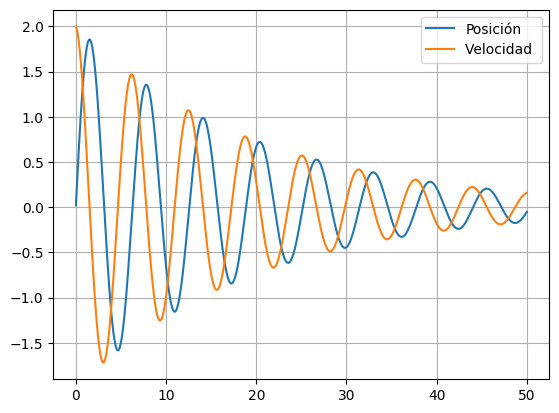

In [4]:

                    #******************************************************
                    #******************************************************

                           #Solucion del oscilador armónico  por(RK4)

                    #******************************************************
                    #******************************************************


import numpy as np
import matplotlib.pyplot as plt


#************************


def f2(t,x,u):
    m=1
    b=0.1
    k=1
    return (1/m)*(-b*u-k*x)

#**************************

h = 0.01
t = np.arange(0,50,h)
x = np.zeros(len(t))
u = np.zeros(len(t))

x_ant = 0
u_ant = 2

for i in range(0,len(t)):

    l1 = h * u_ant
    k1 = h * f2(t[i], x_ant, u_ant )

    l2 = h * ( u_ant + k1/2)
    k2 = h * f2( t[i] + h/2 , x_ant + l1/2 , u_ant + k1/2 )

    l3 = h * ( u_ant + k2/2 )
    k3 = h * f2( t[i] + h/2, x_ant + l2/2 , u_ant + k2/2)

    l4 = h * ( u_ant + k3 )
    k4 = h * f2(t[i] + h, x_ant + l3 , u_ant + k3)

    x[i] = x_ant + (l1 +2*l2 + 2*l3 +l4 )/6
    u[i] = u_ant + (k1 + 2*k2 + 2*k3 + k4) / 6

    x_ant = x[i]
    u_ant = u[i]



plt.plot(t, x, label='Posición')
plt.plot(t,u , label = 'Velocidad ')

plt.legend()
plt.grid()
plt.show()

